# Факторный анализ в Python

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [3]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
f_len = len(features)
unclr_data = pd.read_excel('Data.xlsx', sheet_name='Итоговые данные', index_col=0)
unclr_data.columns = features

unclr_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Субъект Российской Федерации,,,,,,,,,,,
Алтайский край,1166,5.8,18.334,17.6,60.7,0.60,0.42,5.76,1.38,4.64,-18.0
Амурская область,1109,7.1,26.407,15.7,64.1,0.82,0.51,11.54,2.50,9.16,0.2
Архангельская область,1132,6.1,29.187,13.6,60.0,0.73,0.78,7.04,0.76,4.79,-26.0
Астраханская область,1122,5.8,21.558,15.5,62.2,0.77,0.84,3.90,1.33,3.90,-78.0
Белгородская область,1163,6.7,26.072,7.8,67.3,0.31,0.47,3.77,0.69,2.61,60.0


## Удаляем строки с пустыми значениями и стандартизируем данные

In [4]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64')
index = unsc_data.index 
columns = unsc_data.columns 
scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Субъект Российской Федерации,,,,,,,,,,,
Алтайский край,0.480197,-0.517762,-0.796615,0.654258,-0.497539,-0.337127,-1.246125,-0.103236,0.188463,0.058932,-0.468984
Амурская область,-0.613109,0.877670,0.254169,0.284550,0.162648,0.426103,-0.781334,2.234082,2.272277,2.472753,-0.130889
Архангельская область,-0.171950,-0.195739,0.616015,-0.124076,-0.633460,0.113872,0.613038,0.414371,-0.965077,0.139037,-0.617597
Астраханская область,-0.363758,-0.517762,-0.376978,0.245633,-0.206280,0.252642,0.922898,-0.855383,0.095435,-0.336251,-1.583583
Белгородская область,0.422655,0.448306,0.210566,-1.252660,0.784000,-1.343204,-0.987908,-0.907952,-1.095316,-1.025152,0.979995


## Корреляционная матрица

In [5]:
correlations = data.corr()

correlations

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
X1,1.000000,-0.205191,-0.277350,-0.094923,-0.197819,0.013888,-0.081434,0.044574,-0.090323,-0.091356,0.065260
X2,-0.205191,1.000000,0.562959,-0.337355,0.508570,0.278085,-0.353069,0.309643,0.159177,0.310041,0.089036
X3,-0.277350,0.562959,1.000000,-0.703113,0.683757,0.153176,0.044703,0.155135,-0.016922,0.022604,0.159592
X4,-0.094923,-0.337355,-0.703113,1.000000,-0.698725,-0.089983,-0.073479,-0.001813,0.193735,0.209336,-0.261957
X5,-0.197819,0.508570,0.683757,-0.698725,1.000000,0.194622,0.004120,0.076230,-0.152133,-0.112884,0.163452
X6,0.013888,0.278085,0.153176,-0.089983,0.194622,1.000000,0.168351,0.423279,0.597555,0.321700,-0.224096
X7,-0.081434,-0.353069,0.044703,-0.073479,0.004120,0.168351,1.000000,-0.081883,0.072092,-0.073084,-0.078402
X8,0.044574,0.309643,0.155135,-0.001813,0.076230,0.423279,-0.081883,1.000000,0.470760,0.860869,-0.177160
X9,-0.090323,0.159177,-0.016922,0.193735,-0.152133,0.597555,0.072092,0.470760,1.000000,0.507314,-0.362135
X10,-0.091356,0.310041,0.022604,0.209336,-0.112884,0.321700,-0.073084,0.860869,0.507314,1.000000,-0.118660


## Проверим гипотезу о незначимости корреляционной матрицы с использованием критерия Уилкса

In [6]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R), math.e)

chi_2_crt=chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно {}'.format(p_value))
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 475.45052561710423
Значение p-value равно 2.8510869623423883e-68
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## Оценка общности признаков
### Общность- доля дисперсии признака, объясняемая общими факторами
### Для i-ого признака: квадрат оценки множественного коеффициента детерминации уравнения регрессии i-ого признака на все остальные 

In [8]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}".format(variable, ' + '.join(set(features)-set([variable]))), 
                             data=data).fit().rsquared)

pd.DataFrame(communalities,index = features,columns = ['Communalities'])

,Communalities
X1,0.380119
X2,0.627528
X3,0.708462
X4,0.712750
X5,0.674332
X6,0.522022
X7,0.339582
X8,0.835207
X9,0.558756
X10,0.846672


## Расчет редуцированной матрицы
### Редуцированная матрица=корреляционная матрица с оценками общностей признака на диагонали

In [9]:
Rh_eval = np.empty((f_len,f_len)) 
for i in range(f_len):
    for j in range(f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
pd.DataFrame(Rh_eval, index=features, columns=features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
X1,0.380119,-0.205191,-0.277350,-0.094923,-0.197819,0.013888,-0.081434,0.044574,-0.090323,-0.091356,0.065260
X2,-0.205191,0.627528,0.562959,-0.337355,0.508570,0.278085,-0.353069,0.309643,0.159177,0.310041,0.089036
X3,-0.277350,0.562959,0.708462,-0.703113,0.683757,0.153176,0.044703,0.155135,-0.016922,0.022604,0.159592
X4,-0.094923,-0.337355,-0.703113,0.712750,-0.698725,-0.089983,-0.073479,-0.001813,0.193735,0.209336,-0.261957
X5,-0.197819,0.508570,0.683757,-0.698725,0.674332,0.194622,0.004120,0.076230,-0.152133,-0.112884,0.163452
X6,0.013888,0.278085,0.153176,-0.089983,0.194622,0.522022,0.168351,0.423279,0.597555,0.321700,-0.224096
X7,-0.081434,-0.353069,0.044703,-0.073479,0.004120,0.168351,0.339582,-0.081883,0.072092,-0.073084,-0.078402
X8,0.044574,0.309643,0.155135,-0.001813,0.076230,0.423279,-0.081883,0.835207,0.470760,0.860869,-0.177160
X9,-0.090323,0.159177,-0.016922,0.193735,-0.152133,0.597555,0.072092,0.470760,0.558756,0.507314,-0.362135
X10,-0.091356,0.310041,0.022604,0.209336,-0.112884,0.321700,-0.073084,0.860869,0.507314,0.846672,-0.118660


## Расчет собственных чисел и соответствующих им собственных векторов редуцированной матрицы

### Собственные значения- дисперсия выделенных факторов

In [10]:
uns_eigenvalues_Rh_eval, eigenveсtors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]

for i in range(len(uns_eigenvalues_Rh_eval)):
    couple_lst.append((uns_eigenvalues_Rh_eval[i], eigenveсtors_Rh_eval[:,i]))

from operator import itemgetter

couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)

couple_lst

[(2.724788578265164,
  array([ 0.11684148, -0.42928167, -0.41689895,  0.29539775, -0.36591838,
         -0.30927958,  0.03637129, -0.39238664, -0.22757467, -0.32293843,
          0.00900175])),
 (2.4362682706136995,
  array([-0.03412274,  0.09526328,  0.32234159, -0.41959966,  0.36813113,
         -0.20673472, -0.00197178, -0.36340397, -0.38788216, -0.43665229,
          0.24155471])),
 (0.8231240603462633,
  array([-0.07566574, -0.31434457,  0.07683605, -0.13325261,  0.09216175,
          0.44448316,  0.59649453, -0.18920473,  0.32353232, -0.2995016 ,
         -0.28242621])),
 (0.5916296952320163,
  array([ 0.7584871 , -0.26335696, -0.12848118, -0.41246522, -0.02387595,
          0.10094626,  0.08211076,  0.32498513, -0.11867547,  0.04623863,
          0.17136469])),
 (0.40237488977413277,
  array([-0.33523876, -0.38505423,  0.19972054, -0.02902554, -0.00708831,
         -0.36100292,  0.49662866,  0.25617949, -0.26522295,  0.39622751,
          0.16922373])),
 (0.07486639788679456,
  

In [19]:
result = []
for x in couple_lst:
    result.append([x[0]])
result =  pd.DataFrame(result, columns=["eigenvalue"])

In [38]:
result["cumulateive eigenvalue"] = np.cumsum(result['eigenvalue'])
result["total variance"] = dft["Tot_var"]
result["cumulative total variance"] = np.cumsum(dft["Tot_var"])
result

,eigenvalue,cumulateive eigenvalue,total variance,cumulative total variance
0,2.724789,2.724789,24.770805,24.770805
1,2.436268,5.161057,22.147893,46.918699
2,0.823124,5.984181,7.482946,54.401645
3,0.591630,6.575811,5.378452,59.780096
4,0.402375,6.978185,3.657954,63.438050
5,0.074866,7.053052,0.680604,64.118654
6,0.033914,7.086966,0.308306,64.426959
7,-0.099533,6.987432,-0.904848,63.522111
8,-0.130568,6.856864,-1.186983,62.335128
9,-0.188576,6.668288,-1.714331,60.620797


## Сравнение суммарной общности с суммой собственных чисел редуцированной матрицы для поиска количества факторов, до которого можно снизить размерность признакового пространства. 

In [26]:
#np.trace- сумма диагональных элементов матрицы
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первого собственного числа редуцированной матрицы:', eigenvalues_Rh_eval[0])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]:
    print('Размерность признакового пространства можно снизить до одного общего фактора.')
else:
    print('До одного фактора снизить нельзя')

Суммарная общность:  6.443729127652716
Сумма оценок первого собственного числа редуцированной матрицы: 2.724788578265164
До одного фактора снизить нельзя


In [27]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print('До двух факторов снизить нельзя')

Суммарная общность:  6.443729127652716
Сумма оценок первых двух собственных чисел редуцированной матрицы: 5.1610568488788635
До двух факторов снизить нельзя


In [28]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', 
      eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]:
    print('Размерность признакового пространства можно снизить до трех общих факторов.')
else:
    print('До трех факторов снизить нельзя')

Суммарная общность:  6.443729127652716
Сумма оценок первых трех собственных чисел редуцированной матрицы: 5.984180909225127
До трех факторов снизить нельзя


In [31]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', 
      eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]+eigenvalues_Rh_eval[3])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]+eigenvalues_Rh_eval[3]:
    print('Размерность признакового пространства можно снизить до четырех общих факторов.')
else:
    print('До четурех факторов снизить нельзя')

Суммарная общность:  6.443729127652716
Сумма оценок первых трех собственных чисел редуцированной матрицы: 6.575810604457143
Размерность признакового пространства можно снизить до четырех общих факторов.


## Критерий каменистой осыпи

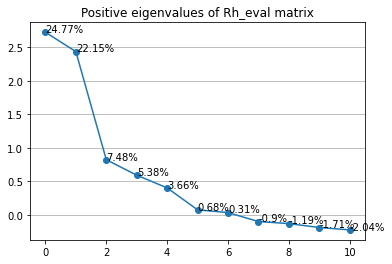

In [39]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= -5:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x *100, 2)).apply(str) +'%'

plt.figure(figsize=(6,4))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

## Критерий Кайзера

In [54]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'
      .format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval >1])))

Критерий Кайзера предлагает 2 фактор(-а/ов).


## Берем два фактора

In [76]:
fact = 4

U = np.empty ((fact,f_len)) 
for i in range(fact):
    U[i]=couple_lst[i][1]

df_U=pd.DataFrame(data=U, index=['Factor_'+str(i +1) for i in range(fact)], columns=features)

df_U.T

,Factor_1,Factor_2,Factor_3,Factor_4
X1,0.116841,-0.034123,-0.075666,0.758487
X2,-0.429282,0.095263,-0.314345,-0.263357
X3,-0.416899,0.322342,0.076836,-0.128481
X4,0.295398,-0.419600,-0.133253,-0.412465
X5,-0.365918,0.368131,0.092162,-0.023876
X6,-0.309280,-0.206735,0.444483,0.100946
X7,0.036371,-0.001972,0.596495,0.082111
X8,-0.392387,-0.363404,-0.189205,0.324985
X9,-0.227575,-0.387882,0.323532,-0.118675
X10,-0.322938,-0.436652,-0.299502,0.046239


In [81]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l)
df_A = pd.DataFrame(data=A, columns=['Factor_'+str(i + 1) for i in range(fact)], index=features)

df_A

,Factor_1,Factor_2,Factor_3,Factor_4
X1,0.192869,-0.053261,-0.068649,0.583409
X2,-0.708612,0.148692,-0.285193,-0.202568
X3,-0.688172,0.503128,0.069710,-0.098824
X4,0.487611,-0.654934,-0.120895,-0.317258
X5,-0.604019,0.574599,0.083615,-0.018365
X6,-0.510526,-0.322683,0.403263,0.077645
X7,0.060038,-0.003078,0.541177,0.063158
X8,-0.647710,-0.567221,-0.171658,0.249970
X9,-0.375656,-0.605428,0.293529,-0.091282
X10,-0.533072,-0.681551,-0.271726,0.035566


In [82]:
# df_A['Factor_1'] *= -1# если не совпал первый столбец
# df_A['Factor_2'] *= -1# если не совпал второй столбец
# df_A['Factor_3'] *= -1# если не совпал третий столбец
df_A

,Factor_1,Factor_2,Factor_3,Factor_4
X1,0.192869,-0.053261,-0.068649,0.583409
X2,-0.708612,0.148692,-0.285193,-0.202568
X3,-0.688172,0.503128,0.069710,-0.098824
X4,0.487611,-0.654934,-0.120895,-0.317258
X5,-0.604019,0.574599,0.083615,-0.018365
X6,-0.510526,-0.322683,0.403263,0.077645
X7,0.060038,-0.003078,0.541177,0.063158
X8,-0.647710,-0.567221,-0.171658,0.249970
X9,-0.375656,-0.605428,0.293529,-0.091282
X10,-0.533072,-0.681551,-0.271726,0.035566


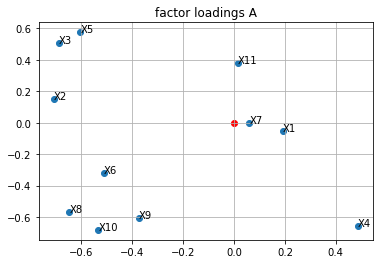

In [83]:
plt.scatter(df_A['Factor_1'], df_A['Factor_2'])
plt.scatter (0, 0, c = 'r')
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable), xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

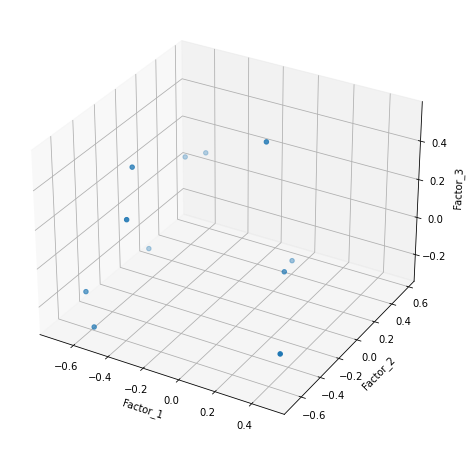

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_A['Factor_1'], df_A['Factor_2'], df_A['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [86]:
def quartimax (X): 
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')

## Вращение в случае двух факторов

In [96]:
A[:, :2]

array([[ 0.19286945, -0.05326065],
       [-0.7086124 ,  0.14869216],
       [-0.68817233,  0.50312847],
       [ 0.48761111, -0.65493421],
       [-0.60401905,  0.57459931],
       [-0.51052575, -0.32268291],
       [ 0.06003785, -0.00307766],
       [-0.64771002, -0.56722089],
       [-0.37565599, -0.6054278 ],
       [-0.53307232, -0.68155091],
       [ 0.01485913,  0.37703188]])

In [97]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A[:, :2],T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column
df_rotation

,rad,grad,criteria
0,0.0000,0.000000,-0.349703
1,0.0001,0.005730,-0.349689
2,0.0002,0.011459,-0.349676
3,0.0003,0.017189,-0.349662
4,0.0004,0.022918,-0.349649
...,...,...,...
15703,1.5703,89.971563,-0.349769
15704,1.5704,89.977292,-0.349755
15705,1.5705,89.983022,-0.349742
15706,1.5706,89.988751,-0.349729


## Для трех факторов (выполняется около 10 минут), используем квартимакс в качестве критерия

In [99]:
import tqdm
radx_column = []
gradx_column=[]
rady_column = []
grady_column=[]
radz_column = []
gradz_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.01):
    print(alpha)
    for alpha2 in arange(0, pi/2, 0.01):
        for alpha3 in arange(0, pi/2, 0.01):
            radx_column.append(alpha)
            gradx_column.append(alpha*180/pi)
            rady_column.append(alpha2)
            grady_column.append(alpha2*180/pi)
            radz_column.append(alpha3)
            gradz_column.append(alpha3*180/pi)            
            
            grad = alpha
            grad2 = alpha2
            grad3 = alpha3
            T = [[1, 0, 0],
                 [0, cos(grad), -sin(grad)],
                 [0, sin(grad), cos(grad)]]
            T2 = [[cos(grad2), 0, sin(grad2)],
                 [0, 1, 0],
                 [-sin(grad2), 0, cos(grad2)]]
            T3 = [[cos(grad3), -sin(grad3), 0],
                 [sin(grad3), cos(grad3), 0],
                 [0, 0, 1]]
            B = np.dot(np.dot(np.dot (A[:, :3],T), T2), T3)
            dict_for_B[criteria('quartimax',B)] = B
            criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['radx'] = radx_column
df_rotation['gradx'] = gradx_column
df_rotation['rady'] = rady_column
df_rotation['grady'] = grady_column
df_rotation['radz'] = radz_column
df_rotation['gradz'] = gradz_column
df_rotation ['criteria'] = criteria_column
df_rotation

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

,radx,gradx,rady,grady,radz,gradz,criteria
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,-0.211323
1,0.00,0.000000,0.00,0.000000,0.01,0.572958,-0.211867
2,0.00,0.000000,0.00,0.000000,0.02,1.145916,-0.212306
3,0.00,0.000000,0.00,0.000000,0.03,1.718873,-0.212639
4,0.00,0.000000,0.00,0.000000,0.04,2.291831,-0.212866
...,...,...,...,...,...,...,...
3944307,1.57,89.954374,1.57,89.954374,1.53,87.662543,-0.213436
3944308,1.57,89.954374,1.57,89.954374,1.54,88.235500,-0.212899
3944309,1.57,89.954374,1.57,89.954374,1.55,88.808458,-0.212372
3944310,1.57,89.954374,1.57,89.954374,1.56,89.381416,-0.211857


In [100]:
criteria_best = df_rotation ['criteria'].max()

criteria_best

-0.07274721988380231

## Вывод лучшего угла вращения для трех факторов

In [108]:
radx_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radx']
gradx_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradx']
rady_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rady']
grady_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grady']
radz_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radz']
gradz_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradz']

print ('Лучший угол для вращения x:{:.3f} y:{:.3f} z:{:.3f} радиан или x:{:.3f} y:{:.3f} z:{:.3f} градусов'
       .format (radx_best, gradx_best, rady_best, grady_best, radz_best, gradz_best))

Лучший угол для вращения x:1.570 y:89.954 z:0.840 радиан или x:48.128 y:0.220 z:12.605 градусов


## Вывод лучшего угла вращения для двух факторов

In [102]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']

print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

KeyError: 'rad'

## Матрица факторного отображения после вращения

In [115]:
B = dict_for_B [criteria_best]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(fact - 1)], index=features)

df_B

,Factor_1,Factor_2,Factor_3
X1,0.071975,-0.086483,0.179132
X2,-0.415565,-0.199187,-0.627061
X3,-0.067377,0.086910,-0.848225
X4,-0.184746,-0.083102,0.800176
X5,0.042414,0.076664,-0.833258
X6,-0.479322,0.520144,-0.164566
X7,0.154658,0.519955,0.047049
X8,-0.871559,0.018537,-0.103805
X9,-0.620873,0.439123,0.124527
X10,-0.901770,-0.077340,0.057817


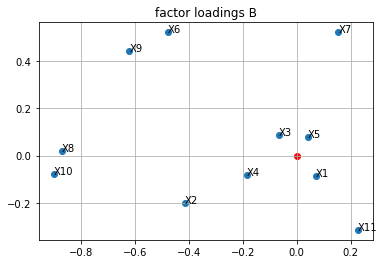

In [116]:
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))

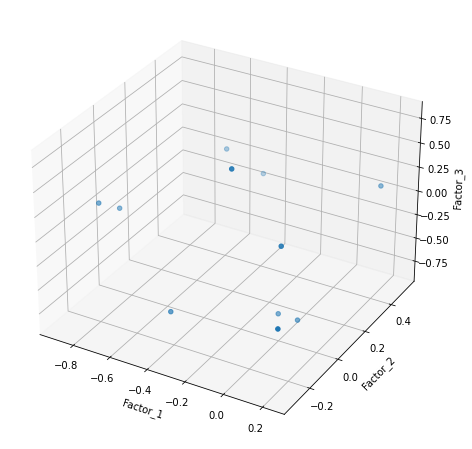

In [117]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_B['Factor_1'], df_B['Factor_2'], df_B['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Оценка редуцированной матрицы парных коэффициентов корреляции

In [118]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
X1,0.044748,-0.125011,-0.164310,0.137227,-0.152840,-0.108962,-0.025408,-0.082929,-0.060357,-0.047860,0.000375
X2,-0.125011,0.605576,0.542578,-0.408432,0.489607,0.198777,-0.197341,0.423590,0.092460,0.353895,0.118609
X3,-0.164310,0.542578,0.731579,-0.673504,0.710595,0.217090,-0.005139,0.148385,-0.025630,0.004996,0.161608
X4,0.137227,-0.408432,-0.673504,0.681319,-0.680960,-0.086354,-0.034135,0.076414,0.177855,0.219289,-0.208708
X5,-0.152840,0.489607,0.710595,-0.680960,0.701995,0.156673,0.007218,0.050951,-0.096432,-0.092353,0.186242
X6,-0.108962,0.198777,0.217090,-0.086354,0.156673,0.527382,0.188579,0.444482,0.505512,0.382495,-0.232578
X7,-0.025408,-0.197341,-0.005139,-0.034135,0.007218,0.188579,0.296486,-0.130039,0.138161,-0.176959,-0.138936
X8,-0.082929,0.423590,0.148385,0.076414,0.050951,0.444482,-0.130039,0.770734,0.536341,0.778510,-0.179500
X9,-0.060357,0.092460,-0.025630,0.177855,-0.096432,0.505512,0.138161,0.536341,0.593819,0.533122,-0.309060
X10,-0.047860,0.353895,0.004996,0.219289,-0.092353,0.382495,-0.176959,0.778510,0.533122,0.822513,-0.195262


## Оценка остаточной матрицы парных коэффициентов корреляции

In [119]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
X1,0.955252,-0.080180,-0.113040,-0.232150,-0.044978,0.122850,-0.056026,0.127502,-0.029966,-0.043496,0.064885
X2,-0.080180,0.394424,0.020381,0.071077,0.018962,0.079308,-0.155728,-0.113946,0.066718,-0.043854,-0.029573
X3,-0.113040,0.020381,0.268421,-0.029609,-0.026838,-0.063915,0.049843,0.006751,0.008708,0.017608,-0.002015
X4,-0.232150,0.071077,-0.029609,0.318681,-0.017765,-0.003629,-0.039344,-0.078227,0.015880,-0.009954,-0.053249
X5,-0.044978,0.018962,-0.026838,-0.017765,0.298005,0.037950,-0.003098,0.025279,-0.055701,-0.020530,-0.022791
X6,0.122850,0.079308,-0.063915,-0.003629,0.037950,0.472618,-0.020227,-0.021203,0.092043,-0.060795,0.008482
X7,-0.056026,-0.155728,0.049843,-0.039344,-0.003098,-0.020227,0.703514,0.048156,-0.066069,0.103875,0.060535
X8,0.127502,-0.113946,0.006751,-0.078227,0.025279,-0.021203,0.048156,0.229266,-0.065581,0.082359,0.002340
X9,-0.029966,0.066718,0.008708,0.015880,-0.055701,0.092043,-0.066069,-0.065581,0.406181,-0.025808,-0.053075
X10,-0.043496,-0.043854,0.017608,-0.009954,-0.020530,-0.060795,0.103875,0.082359,-0.025808,0.177487,0.076601


## Оценки характерностей

In [120]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
    
charact

[0.9773699617788809,
 0.6280319713999686,
 0.5180936602476249,
 0.5645183629528675,
 0.5458985087634751,
 0.6874725208738749,
 0.8387572559618055,
 0.4788169226194906,
 0.6373231207184153,
 0.4212921116479724,
 0.8899269837495734]

## Связь исходных признаков с главными факторами

In [121]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,1], 2, charact[i], i+1))

X1 = 0.072*F1 + -0.086*F2 + 0.977*D1
X2 = -0.416*F1 + -0.199*F2 + 0.628*D2
X3 = -0.067*F1 + 0.087*F2 + 0.518*D3
X4 = -0.185*F1 + -0.083*F2 + 0.565*D4
X5 = 0.042*F1 + 0.077*F2 + 0.546*D5
X6 = -0.479*F1 + 0.520*F2 + 0.687*D6
X7 = 0.155*F1 + 0.520*F2 + 0.839*D7
X8 = -0.872*F1 + 0.019*F2 + 0.479*D8
X9 = -0.621*F1 + 0.439*F2 + 0.637*D9
X10 = -0.902*F1 + -0.077*F2 + 0.421*D10
X11 = 0.228*F1 + -0.313*F2 + 0.890*D11


## Индивидуальные значения главных факторов, полученные методом Бартлетта

In [122]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect'] )
#df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect', 'Factor3_lect'] ) 
#ДЛЯ 3х

df_factor_scores_lect

ValueError: Shape of passed values is (85, 3), indices imply (85, 2)

## Индивидуальные значения главных факторов, полученные методом, который используется в программе Statistica

In [127]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
#df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , 
                                      #columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
#для 3х

df_factor_scores_stat

,Factor1_stat,Factor2_stat,Factor3_stat
Субъект Российской Федерации,,,
Алтайский край,-0.070182,-0.410630,0.719173
Амурская область,-2.383101,-0.096892,-0.116262
Архангельская область,-0.038842,0.014754,-0.031030
Астраханская область,0.452713,0.785763,0.422136
Белгородская область,1.064777,-1.023960,-0.813840
...,...,...,...
Чеченская Республика,2.001797,-0.942476,1.056363
Чувашская Республика,1.070954,0.752240,0.746110
Чукотский автономный округ,0.867758,-0.216155,-1.874446


## Собираем результат

In [129]:
df_result = pd.concat([df_factor_scores_stat], axis=1)

df_result

,Factor1_stat,Factor2_stat,Factor3_stat
Субъект Российской Федерации,,,
Алтайский край,-0.070182,-0.410630,0.719173
Амурская область,-2.383101,-0.096892,-0.116262
Архангельская область,-0.038842,0.014754,-0.031030
Астраханская область,0.452713,0.785763,0.422136
Белгородская область,1.064777,-1.023960,-0.813840
...,...,...,...
Чеченская Республика,2.001797,-0.942476,1.056363
Чувашская Республика,1.070954,0.752240,0.746110
Чукотский автономный округ,0.867758,-0.216155,-1.874446


# Кластеризация

In [131]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('classes.xlsx')
F = pd.DataFrame(factor_scores)
F.columns = ['Factor_' + str(i + 1) for i in range(factor_scores.shape[1])]
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old
0,-0.070182,-0.410630,0.719173,2,3
1,-2.383101,-0.096892,-0.116262,3,6
2,-0.038842,0.014754,-0.031030,4,3
3,0.452713,0.785763,0.422136,5,4
4,1.064777,-1.023960,-0.813840,2,2
...,...,...,...,...,...
80,2.001797,-0.942476,1.056363,6,1
81,1.070954,0.752240,0.746110,6,1
82,0.867758,-0.216155,-1.874446,7,7
83,0.313297,0.432186,-1.960723,1,5


In [132]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

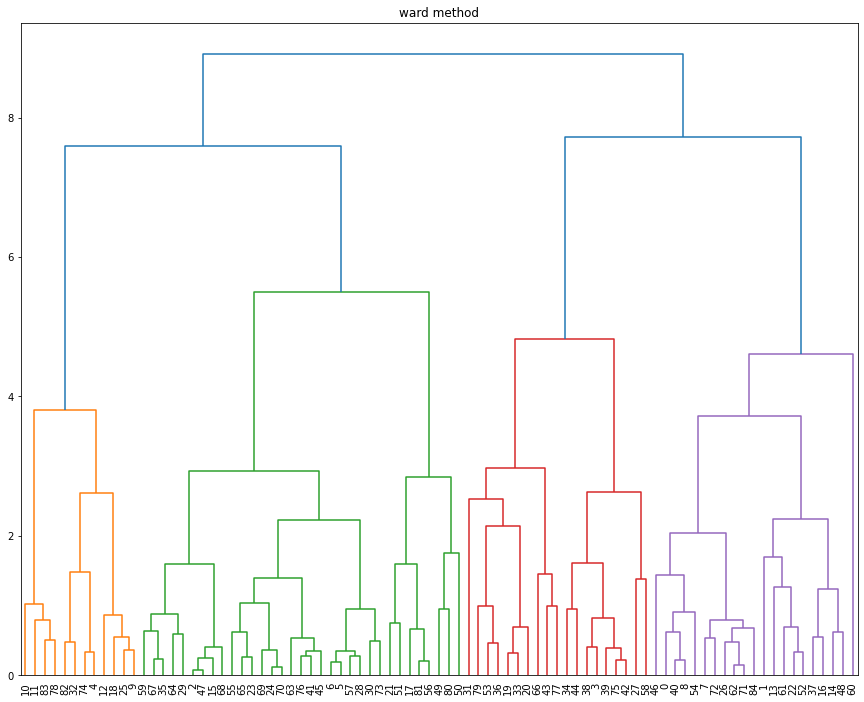

In [134]:
Z = hierarchy.linkage(factor_scores, method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [135]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(factor_scores)

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(factor_scores)

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new
0,-0.070182,-0.410630,0.719173,2,3,1,0
1,-2.383101,-0.096892,-0.116262,3,6,1,3
2,-0.038842,0.014754,-0.031030,4,3,3,0
3,0.452713,0.785763,0.422136,5,4,5,5
4,1.064777,-1.023960,-0.813840,2,2,0,0
...,...,...,...,...,...,...,...
80,2.001797,-0.942476,1.056363,6,1,4,6
81,1.070954,0.752240,0.746110,6,1,4,6
82,0.867758,-0.216155,-1.874446,7,7,0,1
83,0.313297,0.432186,-1.960723,1,5,0,1


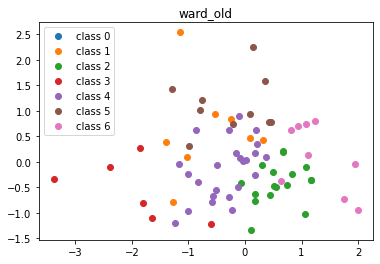

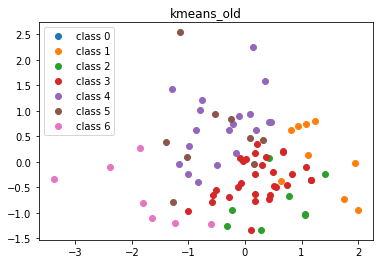

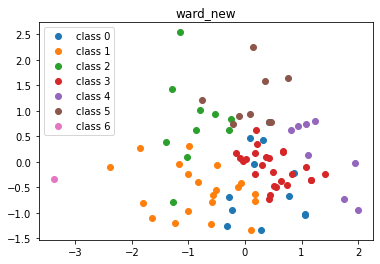

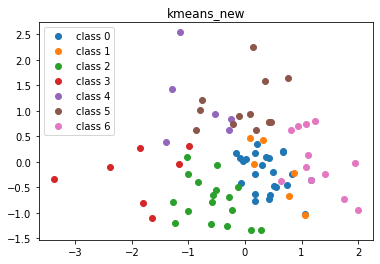

In [136]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

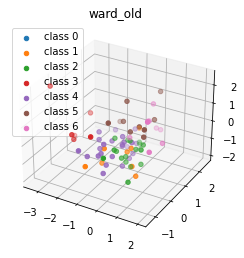

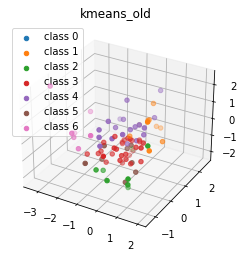

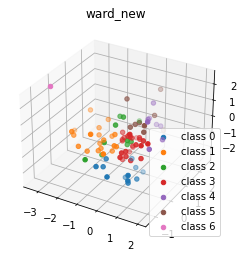

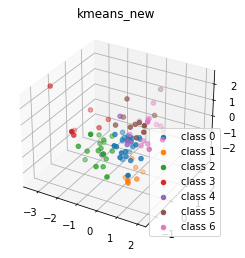

In [137]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [139]:
F.to_excel('4lab_result.xlsx')